In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-10-20 15:30:30--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: 'housing.csv'

     0K .......... .......... .......... .......... ..........  3% 2.73M 0s
    50K .......... .......... .......... .......... ..........  7% 4.80M 0s
   100K .......... .......... .......... .......... .......... 10% 3.48M 0s
   150K .......... .......... .......... .......... .......... 14% 5.73M 0s
   200K .......... .......... .......... .......... .......... 17% 5.17M 0s
   250K .......... .......... .......... .......... .......... 21% 4.29M 0s
   300K .......... .......... .......... .......... .......... 25% 4.62M 0s
   350K .......... .......... ..

In [4]:
df = pd.read_csv('housing.csv')

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
len(df)

20640

#### Preparing the dataset

For this homework, we only want to use a subset of data. This is the same subset we used in homework #2. But in contrast to homework #2, we are going to use all columns of the dataset.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Preparation:

    Fill missing values with zeros.
    Apply the log transform to median_house_value.
    Do train/validation/test split with 60%/20%/20% distribution.
    Use the train_test_split function and set the random_state parameter to 1.
    Use DictVectorizer(sparse=True) to turn the dataframes into matrices.


In [11]:
df = df[(df['ocean_proximity'] ==  '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]

In [12]:
len(df)

15687

In [14]:
df.fillna(0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [17]:
df['median_house_value_logs'] = np.log1p(df.median_house_value)

In [20]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = (df_train.median_house_value_logs)
y_val = (df_val.median_house_value_logs)
y_test = (df_test.median_house_value_logs)

del df_train['median_house_value_logs']
del df_val['median_house_value_logs']
del df_test['median_house_value_logs']
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [21]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-120.25,37.93,13.0,493.0,76.0,196.0,68.0,3.3750,INLAND
1,-118.40,34.00,10.0,1526.0,339.0,705.0,268.0,5.8083,<1H OCEAN
2,-121.67,38.85,46.0,645.0,131.0,410.0,122.0,1.7417,INLAND
3,-118.14,33.88,24.0,3305.0,982.0,2085.0,881.0,2.6641,<1H OCEAN
4,-118.11,33.92,34.0,1414.0,263.0,983.0,264.0,4.1767,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
9406,-118.00,34.12,37.0,1340.0,325.0,928.0,333.0,3.9219,INLAND
9407,-118.10,34.10,34.0,2578.0,645.0,1628.0,617.0,2.3400,<1H OCEAN
9408,-117.45,34.01,26.0,3042.0,598.0,1720.0,551.0,2.7600,INLAND
9409,-117.94,34.03,35.0,1375.0,249.0,1015.0,239.0,4.0521,<1H OCEAN


#### Let's train a decision tree regressor to predict the median_house_value variable.

    Train a model with max_depth=1.

Which feature is used for splitting the data?

    ocean_proximity
    total_rooms
    latitude
    population


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

dv = DictVectorizer(sparse=False)
train_dicts = df_train.fillna(0).to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [26]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = dt.predict(X_val)
#roc_auc_score(y_val, y_pred)

In [32]:
dt = DecisionTreeRegressor(max_depth = 1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [33]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



#### Question 2

Train a random forest model with these parameters:

    n_estimators=10
    random_state=1
    n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on validation?

    0.045
    0.245
    0.545
    0.845


In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=1, random_state=1)

In [47]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [36]:
y_pred = rf.predict(X_val)
rmse(y_val, y_pred)


0.24459962783255346

#### Question 3

Now let's experiment with the n_estimators parameter

    Try different values of this parameter from 10 to 200 with step 10.
    Set random_state to 1.
    Evaluate the model on the validation dataset.

After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for retrieving the answer.

    10
    25
    50
    160


In [48]:
scores = []

for n in range (10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)  
    scores.append((n, rmse(y_val, y_pred)))
    
    

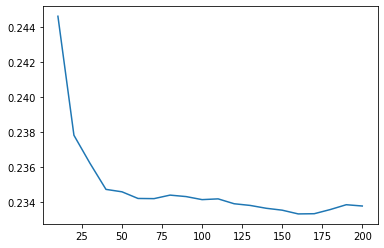

In [49]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
plt.plot(df_scores.n_estimators, df_scores.rmse)

In [57]:
df_scores.round(3)

,n_estimators,rmse
0,10,0.245
1,20,0.238
2,30,0.236
3,40,0.235
4,50,0.235
5,60,0.234
6,70,0.234
7,80,0.234
8,90,0.234
9,100,0.234


In [75]:
len(df_scores)

80

#### Question 4

Let's select the best max_depth:

    Try different values of max_depth: [10, 15, 20, 25]
    For each of these values,
        try different values of n_estimators from 10 till 200 (with step 10)
        calculate the mean RMSE
    Fix the random seed: random_state=1

What's the best max_depth, using the mean RMSE?

    10
    15
    20
    25


In [58]:
def estimators(v):
    scores = []

    for n in range (10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=1, max_depth = v)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)  
        scores.append((n, rmse(y_val, y_pred)))
        return scores

In [65]:
values = [10, 15, 20, 25]
means = []
scores = []
for v in values:
    for n in range (10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1, max_depth = v)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)  
        scores.append((v, n, rmse(y_val, y_pred)))
        
    


In [66]:
df_depth_scores = pd.DataFrame(scores, columns = ['depth', 'estimators', 'rmse'] )

In [83]:
df_depth_scores.head(25)

,depth,estimators,rmse
0,10,10,0.250510
1,10,20,0.247411
2,10,30,0.246377
3,10,40,0.245170
4,10,50,0.245689
5,10,60,0.245533
6,10,70,0.245495
7,10,80,0.245653
8,10,90,0.245530
9,10,100,0.245414


In [86]:
values = [10, 15, 20, 25]
for v in values:
    print(df_depth_scores[df_depth_scores['depth'] == v].rmse.mean().round(4))

0.2455
0.2358
0.235
0.2347


#### Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

    Train the model with these parameters:
        n_estimators=10,
        max_depth=20,
        random_state=1,
        n_jobs=-1 (optional)
    Get the feature importance information from this model

What's the most important feature (among these 4)?

    total_rooms
    median_income
    total_bedrooms
    longitude


In [87]:
rf = RandomForestRegressor(n_estimators=10, max_depth = 20, random_state=1, n_jobs=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val) 
rmse(y_pred, y_val)

0.24420914244859301

In [88]:
rf.feature_importances_

array([0.01504314, 0.03006329, 0.10266505, 0.08585341, 0.33548579,
       0.21881985, 0.14745955, 0.02811472, 0.01543366, 0.02106153])

In [89]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'median_house_value_logs'],
      dtype='object')

#### Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

    Install XGBoost
    Create DMatrix for train and validation
    Create a watchlist
    Train a model with these parameters for 100 rounds:

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

Now change eta from 0.3 to 0.1.

Which eta leads to the best RMSE score on the validation dataset?

    0.3
    0.1
    Both give equal value


In [91]:
import xgboost as xgb

In [93]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

c:\Users\rlong\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


In [99]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [102]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, evals=watchlist)

[0]	train-rmse:0.44350	val-rmse:0.44250
[1]	train-rmse:0.36599	val-rmse:0.36916
[2]	train-rmse:0.31556	val-rmse:0.32382
[3]	train-rmse:0.28541	val-rmse:0.29965
[4]	train-rmse:0.26573	val-rmse:0.28417
[5]	train-rmse:0.25338	val-rmse:0.27463
[6]	train-rmse:0.24157	val-rmse:0.26770
[7]	train-rmse:0.23486	val-rmse:0.26423
[8]	train-rmse:0.22668	val-rmse:0.25820
[9]	train-rmse:0.21995	val-rmse:0.25444
[10]	train-rmse:0.21444	val-rmse:0.25179
[11]	train-rmse:0.21155	val-rmse:0.25054
[12]	train-rmse:0.20729	val-rmse:0.24791
[13]	train-rmse:0.20317	val-rmse:0.24628
[14]	train-rmse:0.20135	val-rmse:0.24630
[15]	train-rmse:0.19858	val-rmse:0.24522
[16]	train-rmse:0.19580	val-rmse:0.24445
[17]	train-rmse:0.19333	val-rmse:0.24395
[18]	train-rmse:0.19107	val-rmse:0.24284
[19]	train-rmse:0.18735	val-rmse:0.24127


[20]	train-rmse:0.18524	val-rmse:0.23978
[21]	train-rmse:0.18332	val-rmse:0.23963
[22]	train-rmse:0.18189	val-rmse:0.23892
[23]	train-rmse:0.18006	val-rmse:0.23847
[24]	train-rmse:0.17869	val-rmse:0.23847
[25]	train-rmse:0.17757	val-rmse:0.23830
[26]	train-rmse:0.17520	val-rmse:0.23862
[27]	train-rmse:0.17430	val-rmse:0.23807
[28]	train-rmse:0.17281	val-rmse:0.23793
[29]	train-rmse:0.17091	val-rmse:0.23683
[30]	train-rmse:0.16888	val-rmse:0.23570
[31]	train-rmse:0.16727	val-rmse:0.23505
[32]	train-rmse:0.16553	val-rmse:0.23494
[33]	train-rmse:0.16453	val-rmse:0.23476
[34]	train-rmse:0.16292	val-rmse:0.23490
[35]	train-rmse:0.16113	val-rmse:0.23416
[36]	train-rmse:0.15969	val-rmse:0.23402
[37]	train-rmse:0.15859	val-rmse:0.23362
[38]	train-rmse:0.15726	val-rmse:0.23393
[39]	train-rmse:0.15663	val-rmse:0.23383
[40]	train-rmse:0.15542	val-rmse:0.23318
[41]	train-rmse:0.15426	val-rmse:0.23300
[42]	train-rmse:0.15289	val-rmse:0.23266
[43]	train-rmse:0.15189	val-rmse:0.23252
[44]	train-rmse:

In [103]:
y_pred = model.predict(dval)
rmse(y_pred, y_val)

0.22854424506373328

In [97]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [98]:
y_pred = model.predict(dval)
rmse(y_pred, y_val)

0.23208927121609343